# Task 3: Classification of samples that are not linearly separable

### Part 1

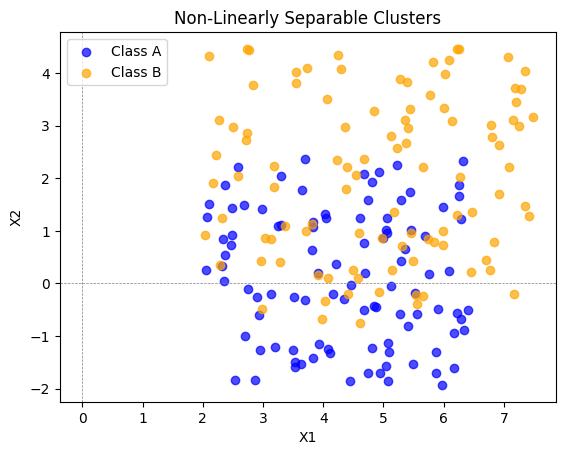

In [1]:
import matplotlib.pyplot as plt
from tools import generate_dataset
import numpy as np

data, labels = generate_dataset(
    n_samples = 100,
    means = np.array([[2.0, -2.0], [2.0, -1.0]]),
    standard_deviations = [4.5, 5.5]
)

classA_points = data[:, labels == 0]
classB_points = data[:, labels == 1]

plt.scatter(classA_points[0, :], classA_points[1, :], label='Class A', alpha=0.7, color='blue')
plt.scatter(classB_points[0, :], classB_points[1, :], label='Class B', alpha=0.7, color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Non-Linearly Separable Clusters')
plt.show()

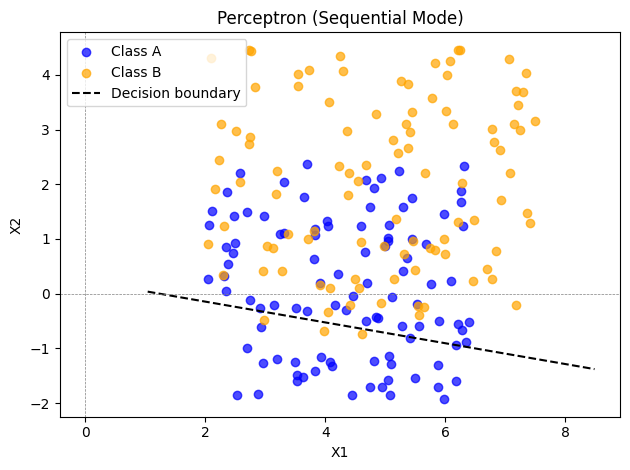

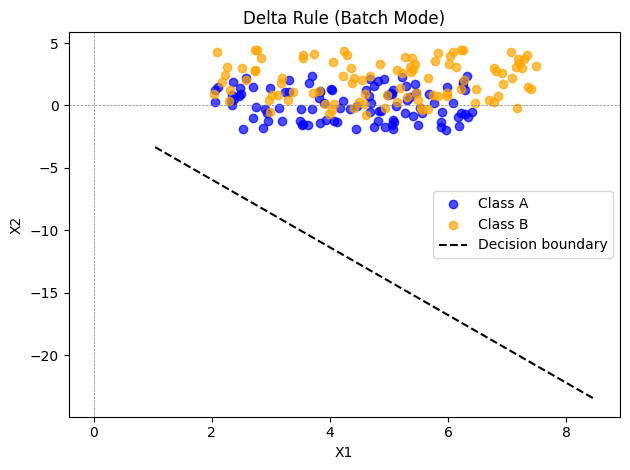

Perceptron Accuracy: 63.00%
Delta Rule Accuracy: 50.00%


In [2]:
from sklearn.metrics import accuracy_score
from tools import (
    PerceptronClassifier, DeltaRuleClassifier, plot_decision_boundary
)

perceptron = PerceptronClassifier()
delta_rule = DeltaRuleClassifier()

# Train Perceptron (Sequential Mode)
perceptron.fit(data, labels, learn_rate=0.01, epochs=20, batch=False)
plot_decision_boundary(perceptron.weights, data, labels, "Perceptron (Sequential Mode)")

# Train Delta Rule (Batch Mode)
delta_rule.fit(data, labels, learn_rate=0.001, epochs=20, batch=True)
plot_decision_boundary(delta_rule.weights, data, labels, "Delta Rule (Batch Mode)")

# Evaluate the classifiers on the training data
perceptron_preds = perceptron.predict(data).flatten()
delta_preds = delta_rule.predict(data).flatten()

# Calculate accuracy
perceptron_accuracy = accuracy_score(labels, perceptron_preds)
delta_accuracy = accuracy_score(labels, delta_preds)

print(f"Perceptron Accuracy: {perceptron_accuracy * 100:.2f}%")
print(f"Delta Rule Accuracy: {delta_accuracy * 100:.2f}%")


### Part 2

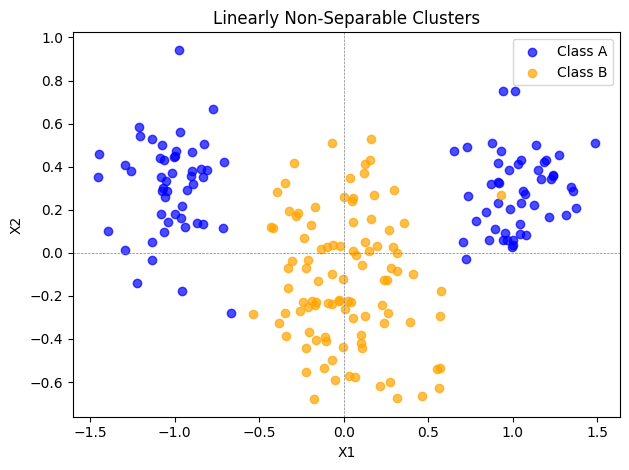

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(20250122)

n_samples = 100
mA = np.array([1.0, 0.3])
sigmaA = 0.2
mB = np.array([0.0, -0.1])
sigmaB = 0.3

classA = np.zeros((2, n_samples))
classA[0, :n_samples//2] = np.random.randn(n_samples//2) * sigmaA - mA[0]
classA[0, n_samples//2:] = np.random.randn(n_samples//2) * sigmaA + mA[0]
classA[1, :] = np.random.randn(n_samples) * sigmaA + mA[1]

classB = np.zeros((2, n_samples))
classB[0, :] = np.random.randn(n_samples) * sigmaB + mB[0]
classB[1, :] = np.random.randn(n_samples) * sigmaB + mB[1]

labels_A = np.zeros(n_samples, dtype=int)
labels_B = np.ones(n_samples, dtype=int)

data = np.hstack((classA, classB))
labels = np.hstack((labels_A, labels_B))

plt.scatter(classA[0, :], classA[1, :], label='Class A', alpha=0.7, color='blue')
plt.scatter(classB[0, :], classB[1, :], label='Class B', alpha=0.7, color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Non-Separable Clusters')
plt.tight_layout()
plt.show()

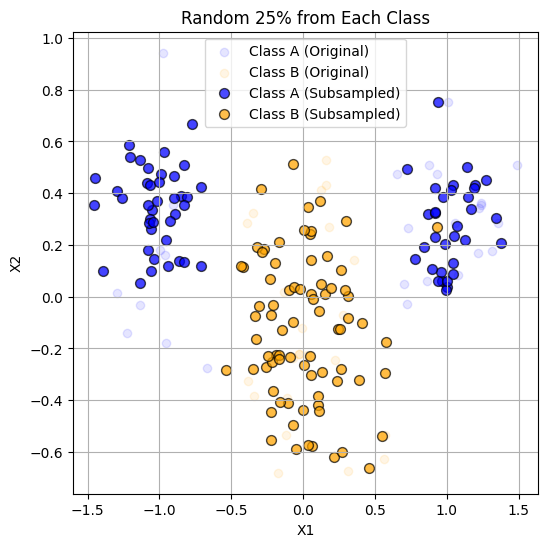

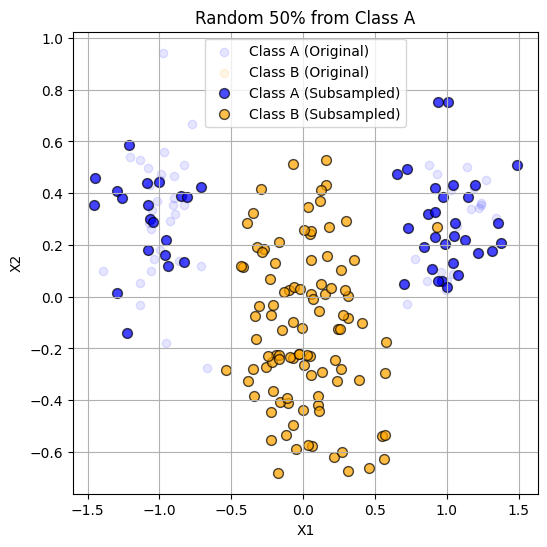

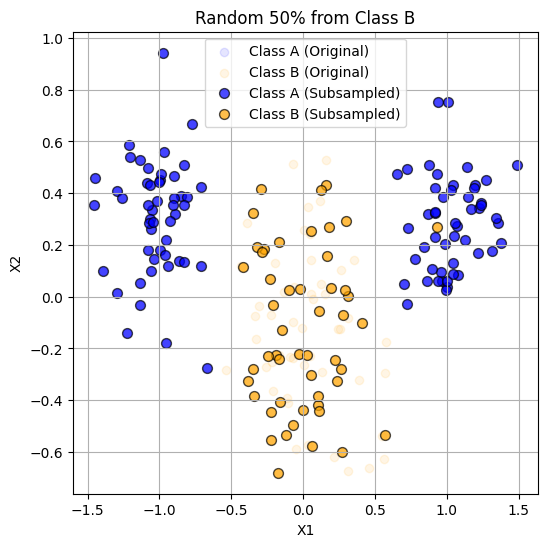

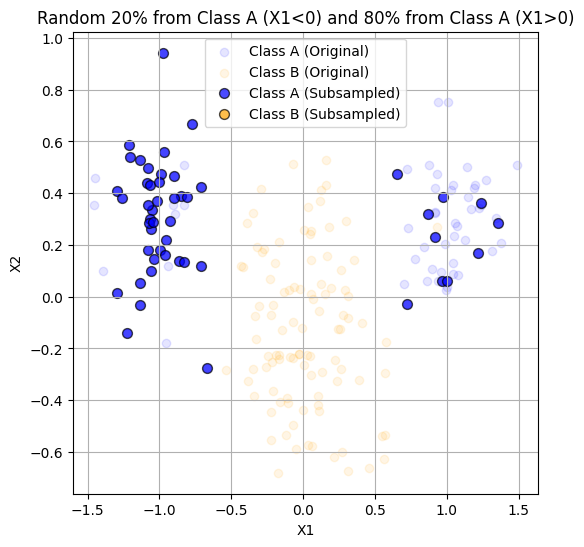

In [4]:
from tools import subsample_random, subsample_condition, plot_datasets

# Random 25% from each class 
data_25, labels_25 = subsample_random(data, labels, 0.25)
plot_datasets(data, labels, data_25, labels_25, "Random 25% from Each Class")

# Random 50% from class A
data_50A, labels_50A = subsample_random(data, labels, 0.5, class_label=0)
plot_datasets(data, labels, data_50A, labels_50A, "Random 50% from Class A")

# Random 50% from class B
data_50B, labels_50B = subsample_random(data, labels, 0.5, class_label=1)
plot_datasets(data, labels, data_50B, labels_50B, "Random 50% from Class B")

# 20% from class A where X1 < 0, and 80% where X1 > 0
condition_1 = lambda d: d[0, :] < 0
condition_2 = lambda d: d[0, :] > 0
data_sub, labels_sub = subsample_condition(classA, labels_A, condition_1, 0.2, condition_2, 0.8)
plot_datasets(data, labels, data_sub, labels_sub, "Random 20% from Class A (X1<0) and 80% from Class A (X1>0)")

In [7]:
delta_rule = DeltaRuleClassifier()
delta_rule.fit(data, labels, learn_rate=0.001, epochs=50, batch=True)

def evaluate_model(model, data, labels):
    preds = model.predict(data)
    accuracy = np.mean(preds.flatten() == labels)
    return accuracy

accuracy_full = evaluate_model(delta_rule, data, labels)
accuracy_25 = evaluate_model(delta_rule, data_25, labels_25)
accuracy_50A = evaluate_model(delta_rule, data_50A, labels_50A)
accuracy_50B = evaluate_model(delta_rule, data_50B, labels_50B)
accuracy_sub = evaluate_model(delta_rule, data_sub, labels_sub)

In [8]:
print(accuracy_full)
print(accuracy_25)
print(accuracy_50A)
print(accuracy_50B)
print(accuracy_sub)

0.5
0.5133333333333333
0.6666666666666666
0.3333333333333333
0.0
